GLASS IDENTIFICATION DATASET(CLASSIFICATION)

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

IMPORTING THE CSV FILE USING PANDAS WITH COLUMN NAMES=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']

In [24]:
df=pd.read_csv('glass.csv',names=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])

GENERAL INFORMATION ABOUT THE GLASSES <BR><BR><BR>
WE HAVE BEEN GIVEN   A DATASET WHICH HAVE TYPE OF CLASS CLASSIFIED IN 7 CATEGORIES<BR>
    CATEGORY 1 TO 4 ARE WINDOW GLASSES <BR>
    IT CONTAINS BOTH FLOATED(ANNEALED/TEMPERATURE TREATED ) GLASSES AND NON FLAOTED GLASSES IN THE DATASET<BR>
    FLOATED GLASSES HAVE HIGHLY EVEN SURFACES AND STRENth WHEN COMPARED TO NON FLOATING GLASS
    THOUGH IT HAVE  DISADVANTAGE OVER NON FLOATING THAT IT IS NOT CAPABLE OF BEARING SUDDEN AND THERMAL LOADSIMPARTED<BR>
    CATEGORY 5 TO 7 IS A NON WINDOW GLASS TYPE WHICH IS USED IN PURPOSES LIKE CONTAINERS ,HEADLAMPS AND TABLEWEARS


In [25]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


IN THIS DATASET WE HAVE BEEN GIVEN DIFFERENT WEIGHT PERCENTAGES OF OXIDES OF ELEMENTS LIKE<BR>
Sodium<br>
Magnesium<br>
Aluminium<br>
SILICON<BR>
POTTASIUM<BR>
CALCIUM<BR>
BARIUM<BR>
IRON<BR>
and the refractive index is also given which helps in knowing about the visibility of the glass

OBSERVATION LEVEL 1<BR>
    THERE ARE TOTAL 10 FEATURES AND A TARGET NAMED TYPE OF GLASS <BR>
    WE HAVE TO FURTHER CLASSIFY THE TYPE OF GLASS IN WINDOW GLASS AND NON WINDOW GLASS<BR>
    
    

CHEKING FOR THE UNIQUE FEATURES IN TYPE OF GLASS

In [26]:
df['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

GLASS QUALITIES CLASSIFICATIONS LEVELS ARE-[1,2,3,5,6,7]

VALUE COUNTS FOR EACH CLASSIFICATION LEVEL

In [27]:
df['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

WE GOT THE MAXIMUM ROWS FOR THE QUALITY LEVEL 2-76
AND COUNTS FOR OTHER LEVELS ARE ALSO SHOWN ABOVE

CHECKING THE DATATYPES OF THE DATA

In [28]:
df.dtypes

Id                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

AS WE CAN OBSERVE THERE ARE 9 FLOAT64 FEATURES AND 1 INT64 AND A TARGET WHICH IS INT64 DATATYPE 

CHECKING FOR THE NULLS

In [29]:
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

DATASET IS HAVING 0 NULLS AND ITS A HEALTHY DATASET IN TERMS OF NULL

DESCRIBING THE DATASET

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,214.0,107.500000,61.920648,1.00000,54.250000,107.50000,160.750000,214.00000
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


FROM JUST OBSERVING THE ABOVE DATSET LOOKS PRETTY WELL DISTRIBUTED AS STANDARD DEVIATIONS ARE LOW FROM THE MEAN AND MAX VALUES ARE NOT TOO MUCH DEVIATING FROM THE MEAN WHICH SHOWS LESS NUMBER OR NO OUTLIERS PRESENT

<BR>
<BR>
PLOTTING A HEATMAP FOR THE DESCRIPTION

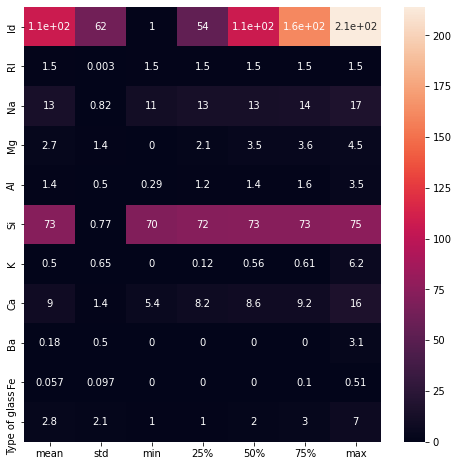

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(df.describe()[1:].T,annot=True,annot_kws={'size':10})
plt.show()

DROPPING THE ID COLUMN AS ITS OF NO SIGNIFICANCE WITH THE QUALITY OF THE GLASS AS IT ONLY SHOWS THE SEQUENCE NUMBER WHICH IS NOT GOING TO INFLUENCE QUALITY IN ANY WAY


In [32]:
df.drop(['Id'],axis=1,inplace=True)

In [33]:
df.shape

(214, 10)

CHEKING FOR THE CORRELATION OF THE FEATURES WITH THE TARGET VARIABLES

In [34]:
print(df.corr()['Type of glass'].drop(['Type of glass']).sort_values())

Mg   -0.744993
Fe   -0.188278
RI   -0.164237
K    -0.010054
Ca    0.000952
Si    0.151565
Na    0.502898
Ba    0.575161
Al    0.598829
Name: Type of glass, dtype: float64


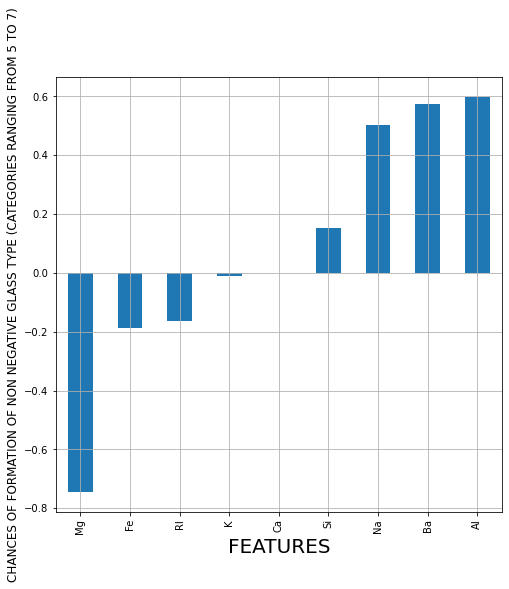

In [35]:
plt.figure(figsize=(8,8))
df.corr()['Type of glass'].drop(['Type of glass']).sort_values().plot(kind='bar',grid=True)
plt.xlabel('FEATURES',fontsize=20)
plt.ylabel('CHANCES OF FORMATION OF NON NEGATIVE GLASS TYPE (CATEGORIES RANGING FROM 5 TO 7)',fontsize=12)
plt.show()

#### AS WE CAN SEE GRAPHICALLY PRESENCE OF aluminium ,barium AND sodium SHOWS A HIGH POSITIVE CORRELATION WITH THE HIGER CATEGORY GLASS LIKE 5 ,6 7 <BR>
#### PRESENCE OF magnesium SHOWS A STRONG NEGATIVE CORRELATION WITH THE TARGET<BR>
#### PRESENCE OF THESE ELEMENTS INFLUENCE THE CATEGORY OF THE GLASS TO LARGE EXTENT<BR>


HEATMAP FOR THE CORRELATION

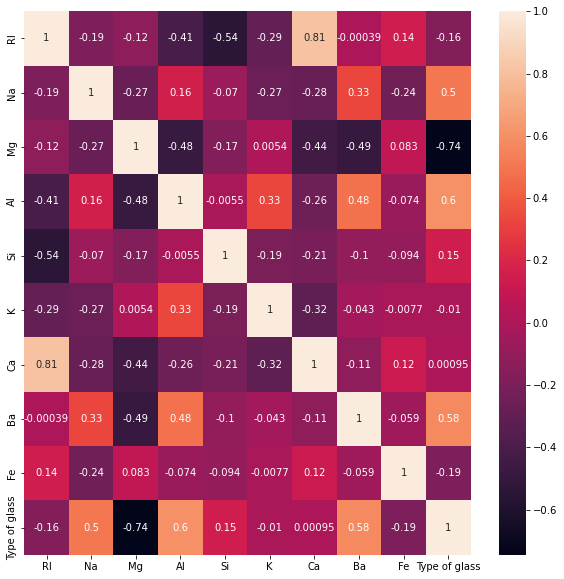

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.show()

THIS HEATMAP DESCRIBES THE RELATIONSHIPS OF THE FEATURES AMONG THEMSELVES AND OF THE FEATURES WITH THE TARGET

<BR>
<BR>
<BR>
PRESENCE OF CALCIUM INFLUENCES THE REFRACTIIVE INDEX OF THE GLASS AND REFRACTIVE INDEX FURTEHR HAVE A 16% SIGNIFICANCE IN DETERMING THE QUALITY OF GLASS SO WE CAN NOT DROP CALCIUM AS OF NOW  BUT WE WILL FURTHER CHECK FOR MULTICOLLINEARITY LEATER AND THEN DECIDE 

PLOTS DESCRIBING THE RELATIONSHIPS OF THE FEATURES WITH THE TARGET

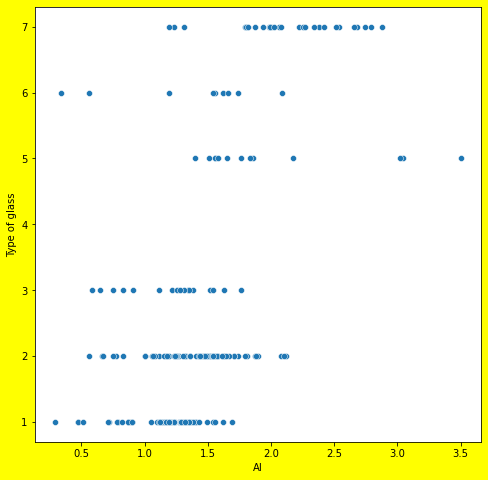

In [15]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.scatterplot(y=df['Type of glass'],x=df['Al'])
plt.show()

HIGH POSITIVE CORRELATION CAN BE OBSERVED AS THE PERCENT OF ALUMINUM INCREASES  <br>
 IT CAN BE CLEARLY OBSERVED THAT PRESENCE OF ALUMINIUM IN PERCENTAGES UPTO 1.7 YIELDS THE FORMATION OF CATEGORIES 1 ,2 AND 3 (WINDOW GLASS TYPE) <BR>
    INCRESING THE PERCENTAGES OFTEN HELPS IN FORMING THE NON WINDOW GLASS TYPE

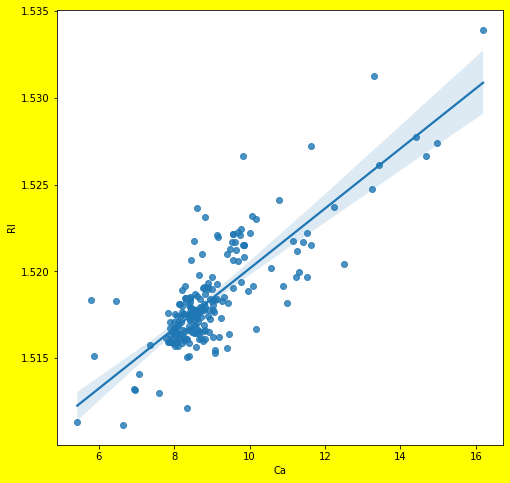

In [16]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.regplot(y=df['RI'],x=df['Ca'])
plt.show()

AS THE PERCENTAGES OF CALCIUM INCREASES ITS OBSERVED THAT REFRACTIVE INDEX ALSO INCREASES AND THATS A STRONG RELATIONSHIP<BR>
    SO PRESENCE OF CALCIUM IN THE GLASS MAY HELP IN IMPROVING THE REFRACTIVE INDEX OF THR GLASS<BR>
    In optics, the refractive index (or refraction index) of an optical medium is a dimensionless number that gives the indication of the light bending ability of that medium.
    
    



In [17]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

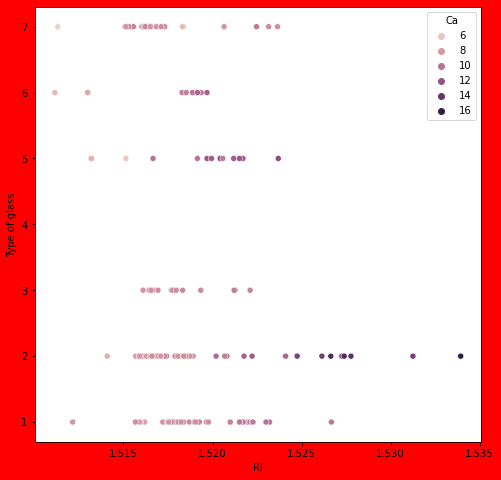

In [18]:
plt.figure(figsize=(8,8),facecolor='Red')
sns.scatterplot(y=df['Type of glass'],x=df['RI'],hue=df['Ca'])
plt.show()

SMALL BUT SIGNIFICANT NEGATIVE CORRELATION BETWEEN REFRACTIVE INDEX AND NON WINDOW GLASS TYPE<br>
WINDOW GLASS CATEGORY ARE SOUGHT TO HAVE HIGH VALUES OF REFRACTIVE INDEX ,PRESENCE OF CALLIUM BEING A MAJOR REASON<br>
LOW REFRACTIVE INDEXES IN NON WINDOW GLASS CATEGORY<br>
from value= 1.515 to value=1.523 there is a uniform kind of distribution among the category 1 to 3


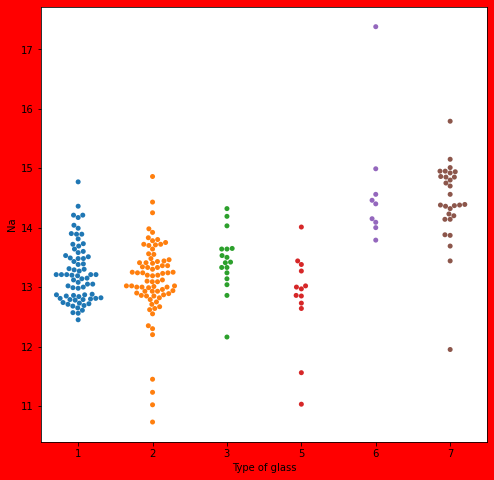

In [19]:
plt.figure(figsize=(8,8),facecolor='Red')
sns.swarmplot(x=df['Type of glass'],y=df['Na'])
plt.show()

LOWER VALUES OF SODIUM OXIDES RESULTS IN FORMATION OF WINDOW GLASS TYPE AND AS THE PERCNTAGE INCREASES WE ARE ATTAINING THE NON WINDOW GLASS STRUCTURES 

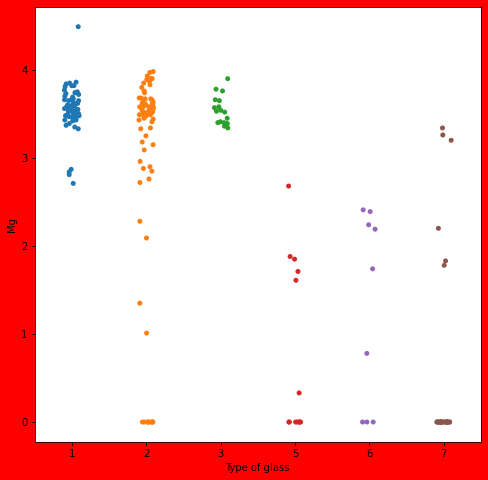

In [20]:
plt.figure(figsize=(8,8),facecolor='Red')
sns.stripplot(x=df['Type of glass'],y=df['Mg'])
plt.show()

A STRONG NEGATIVE CORREALTION BETWEEN PERCENTAGE OF MAGNESIUM OXIDE AND THE CATEGORY OF THE CLASS<BR>
    HIGH VALUE OF MAGNESIUM OXIDES OFTEN LEADS TO FORMATION OF WINDOW GLASS
    AS THE PERCENTAGE DECRESES THERE IS A SHIFT TOWRADS NON WINDOW GLASSES

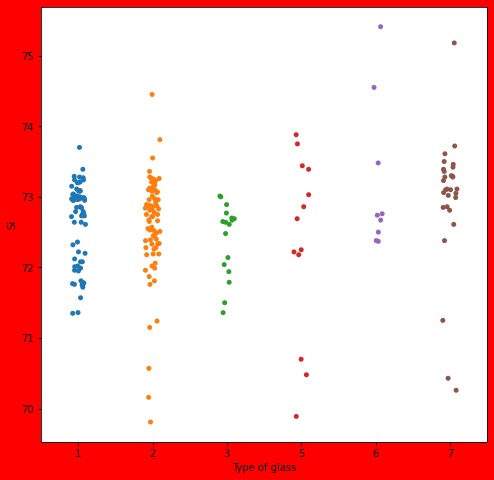

In [21]:
plt.figure(figsize=(8,8),facecolor='Red')
sns.stripplot(x=df['Type of glass'],y=df['Si'],)
plt.show()

WHEN THE PERCENTAGES OF SILICON ARE KEPT AROUND THE MEAN VALUES IT ESCALATES THE FORMATION OF CATEGORY [1,2,3] AND NO SUCH PATTERN IS DEPICTED IN CASE OF LATER CATEGORIES

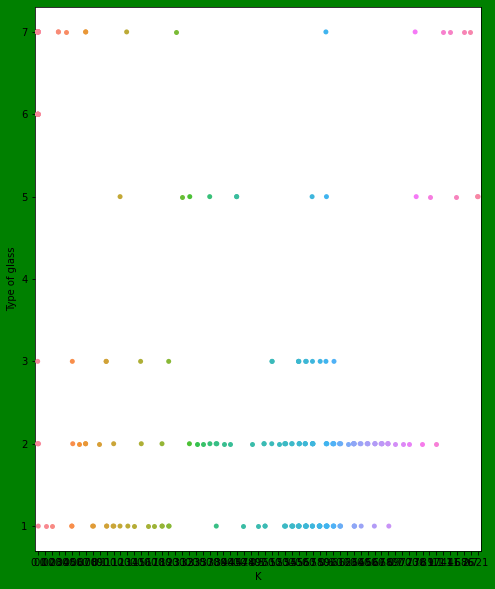

In [22]:
plt.figure(figsize=(8,10),facecolor='Green')
sns.stripplot(y=df['Type of glass'],x=df['K'])
plt.show()

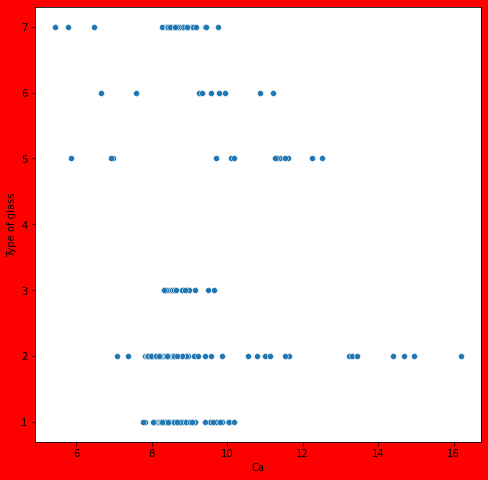

In [23]:
plt.figure(figsize=(8,8),facecolor='Red')
sns.scatterplot(y=df['Type of glass'],x=df['Ca'])
plt.show()

NO CLEAR PATTERN CAN BE OBSERVED WHEN PERCENTAGE OF CALCIUM OXIDE IS TAKEN INTO CONSIDERATION <BR>
    SO JUST WITH THE CALCIUM OXIDE WE CANT DETERMINE WHAT TYPE OF GLASS IS HAVING THE HIGH PROBABILITY OF FORMING


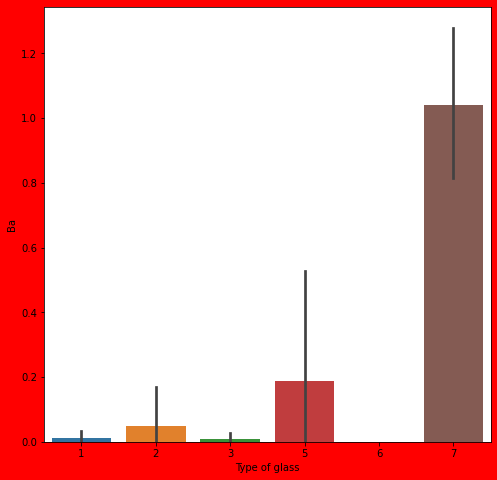

In [24]:
plt.figure(figsize=(8,8),facecolor='Red')
sns.barplot(x=df['Type of glass'],y=df['Ba'])
plt.show()

BARIUM HAVE A STRONG POSITIVE CORRELATION WITH THE NON WINDOW GLASS TYPE<BR>
    

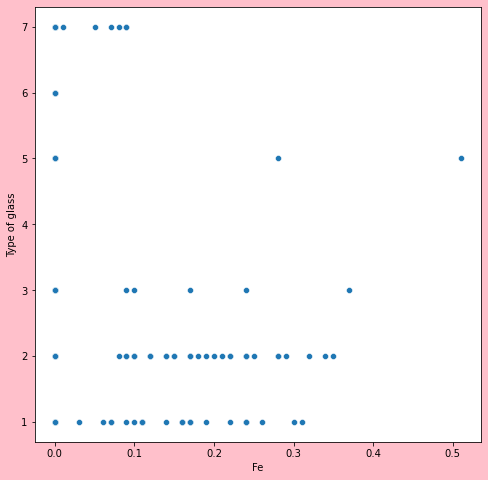

In [25]:
plt.figure(figsize=(8,8),facecolor='Pink')
sns.scatterplot(y=df['Type of glass'],x=df['Fe'])
plt.show()

FROM THE GENERAL INFORMATION WE KNOW THE FACT THAT INCREASE IN THE PRESENCE OF IRON OXIDE DECRESES THE VISIBILTY OF THE GLASS <BR>
IN ARCHITECTURAL AND AUTOMATIVE USES WE NEED SUCH TYPE OF GLASSES (TINTED ONES) SO WE USE IRON AND ITS VERY CLEAR FROM THE PLOT THAT
increase in iron oxide favours the formation of WINDOW TYPE GLASS<BR>
LOW PERCENTAGES OF IRON OXIDE OFTEN LEADS TO CLEAR GLASSES USED IN NON WINDOW TYPES GLASSES

******************************************

#### PLOTS DESCRIBING THE DISTRIBUTION OF THE DATA OF THE FEATURES AND REFRACTIVE INDEX

In [26]:
feat=df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',]]

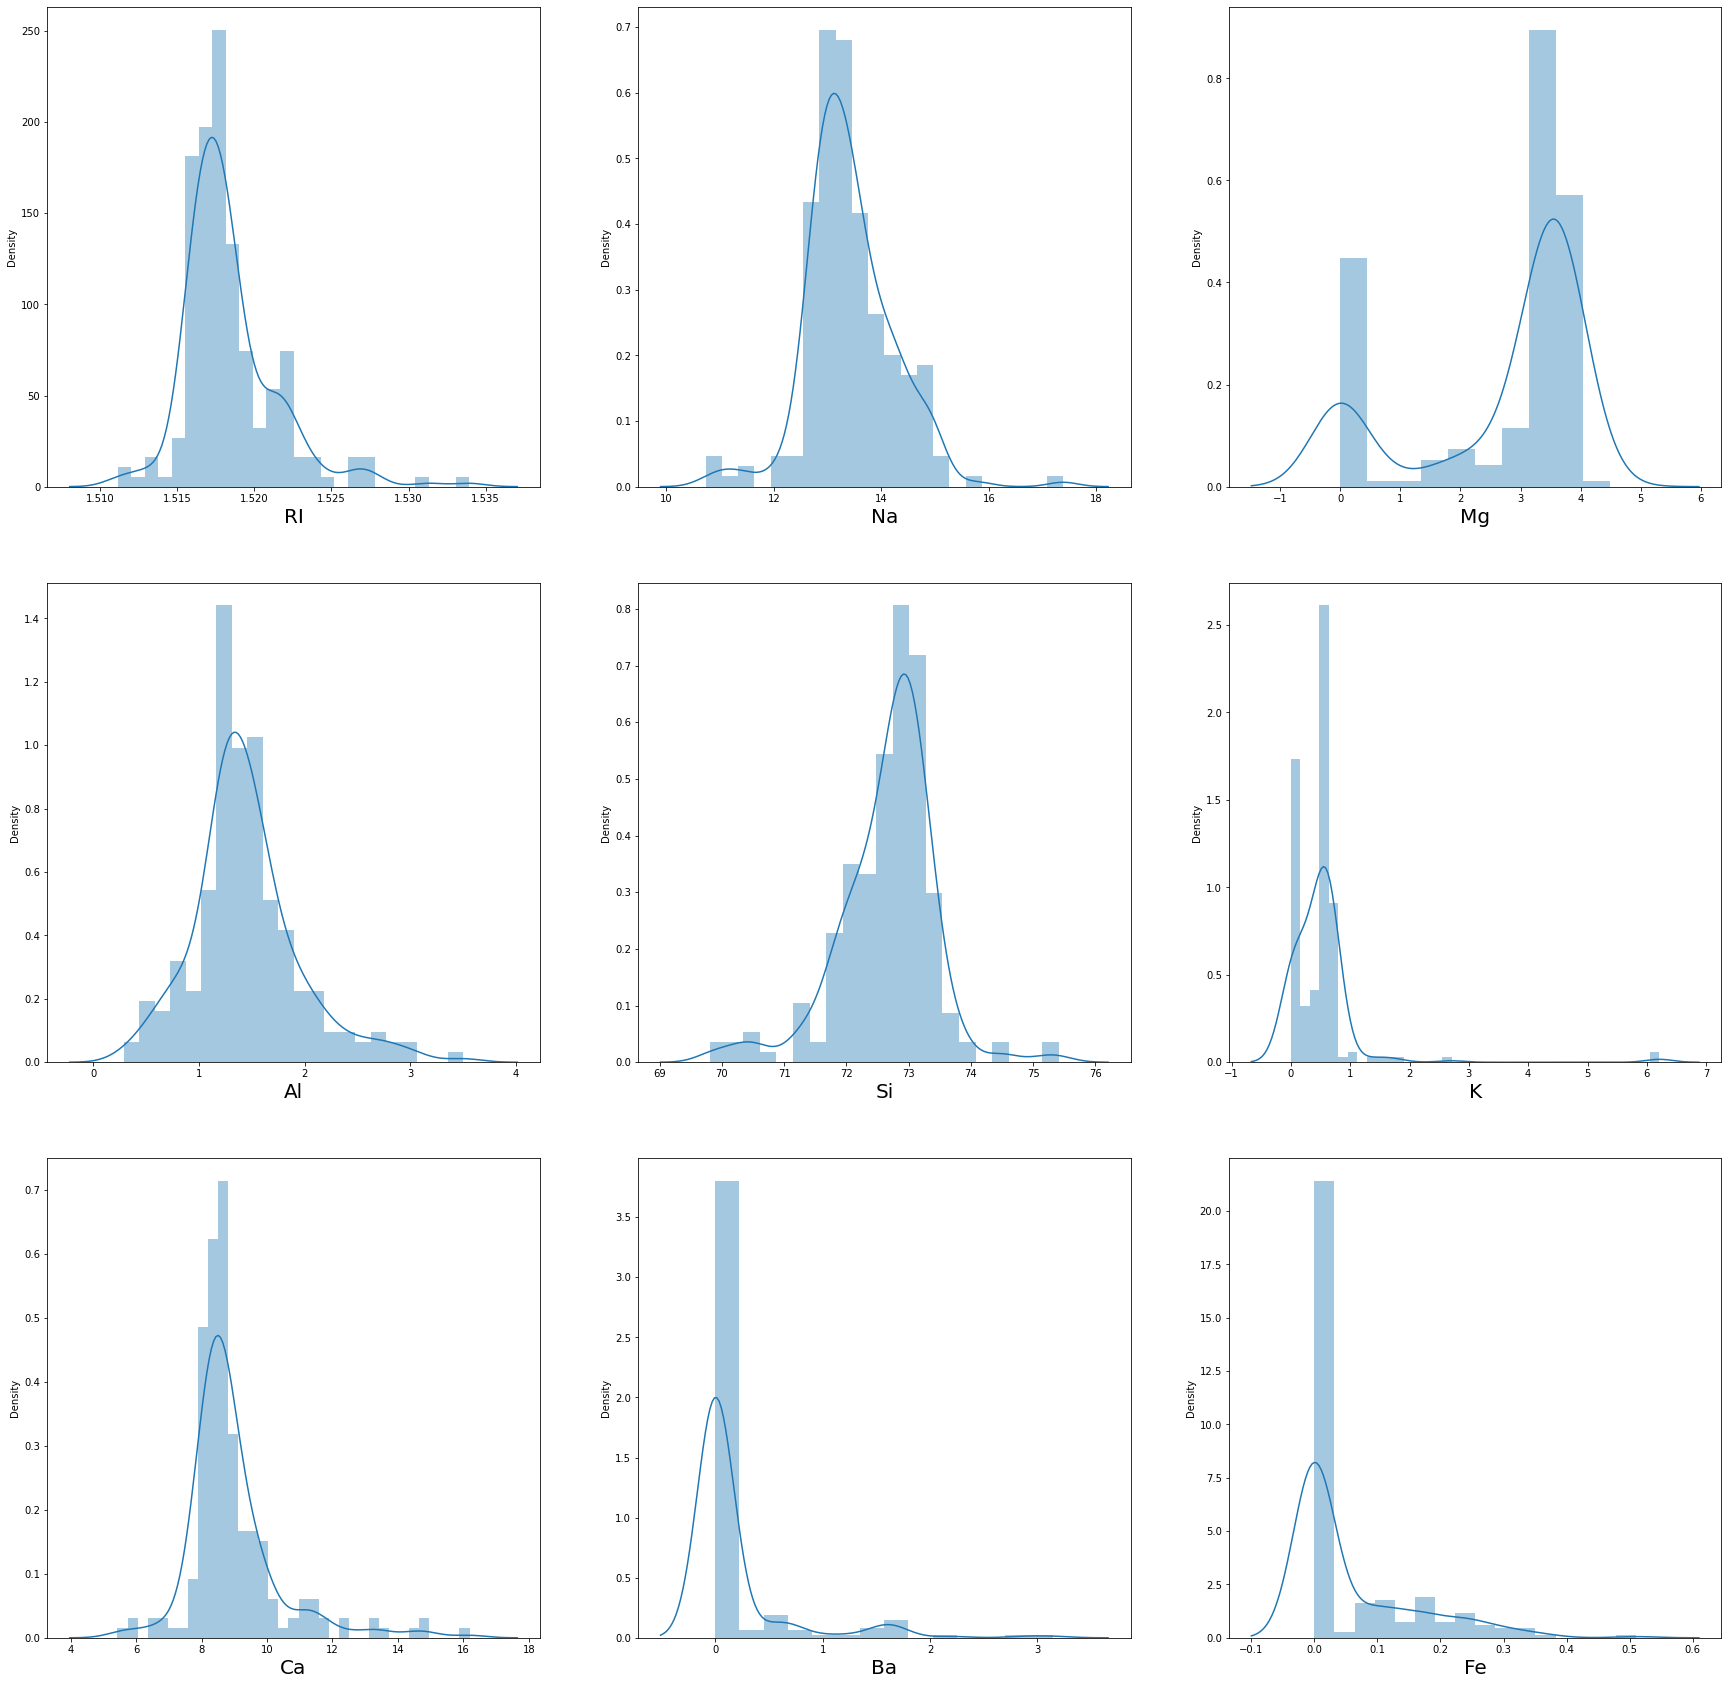

In [27]:
plt.figure(figsize=(30,30))
n=1
for i in feat:
    if n<10:
        ax=plt.subplot(3,3,n)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    n=n+1
plt.show()

IT CAN BE OBSERVED THAT <BR>
SODIUM<BR>
SILICON<BR>
ALUMINUM<BR>
#### HAVE LOW VALUE OF SKEWNWSS REST ALL HAVE WIDE RANGE OF SKEWNESS PRESENT IN THEM<BR>
#### SO WE HAVE TO USE STANDARDISATION/NORMALISATION TECHNIQUES TO OVERCOME THIS PROBLEM<BR>
    

SKEWNESS VALUES /BARPLOT

Mg              -1.152559
Si              -0.730447
Na               0.454181
Al               0.907290
Type of glass    1.114915
RI               1.625431
Fe               1.754327
Ca               2.047054
Ba               3.416425
K                6.551648
dtype: float64





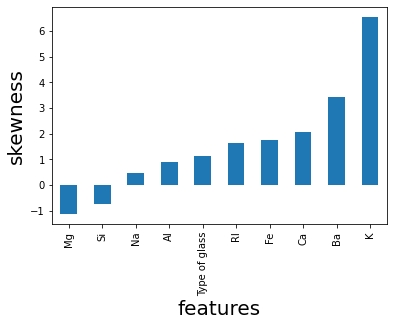

In [28]:
print(df.skew().sort_values())
print('\n\n')
df.skew().sort_values().plot(kind='bar')
plt.xlabel('features',fontsize=20)
plt.ylabel('skewness',fontsize=20)
plt.show()

CHECKING FOR THE OULIERS USING BOXPLOTS<BR>
    

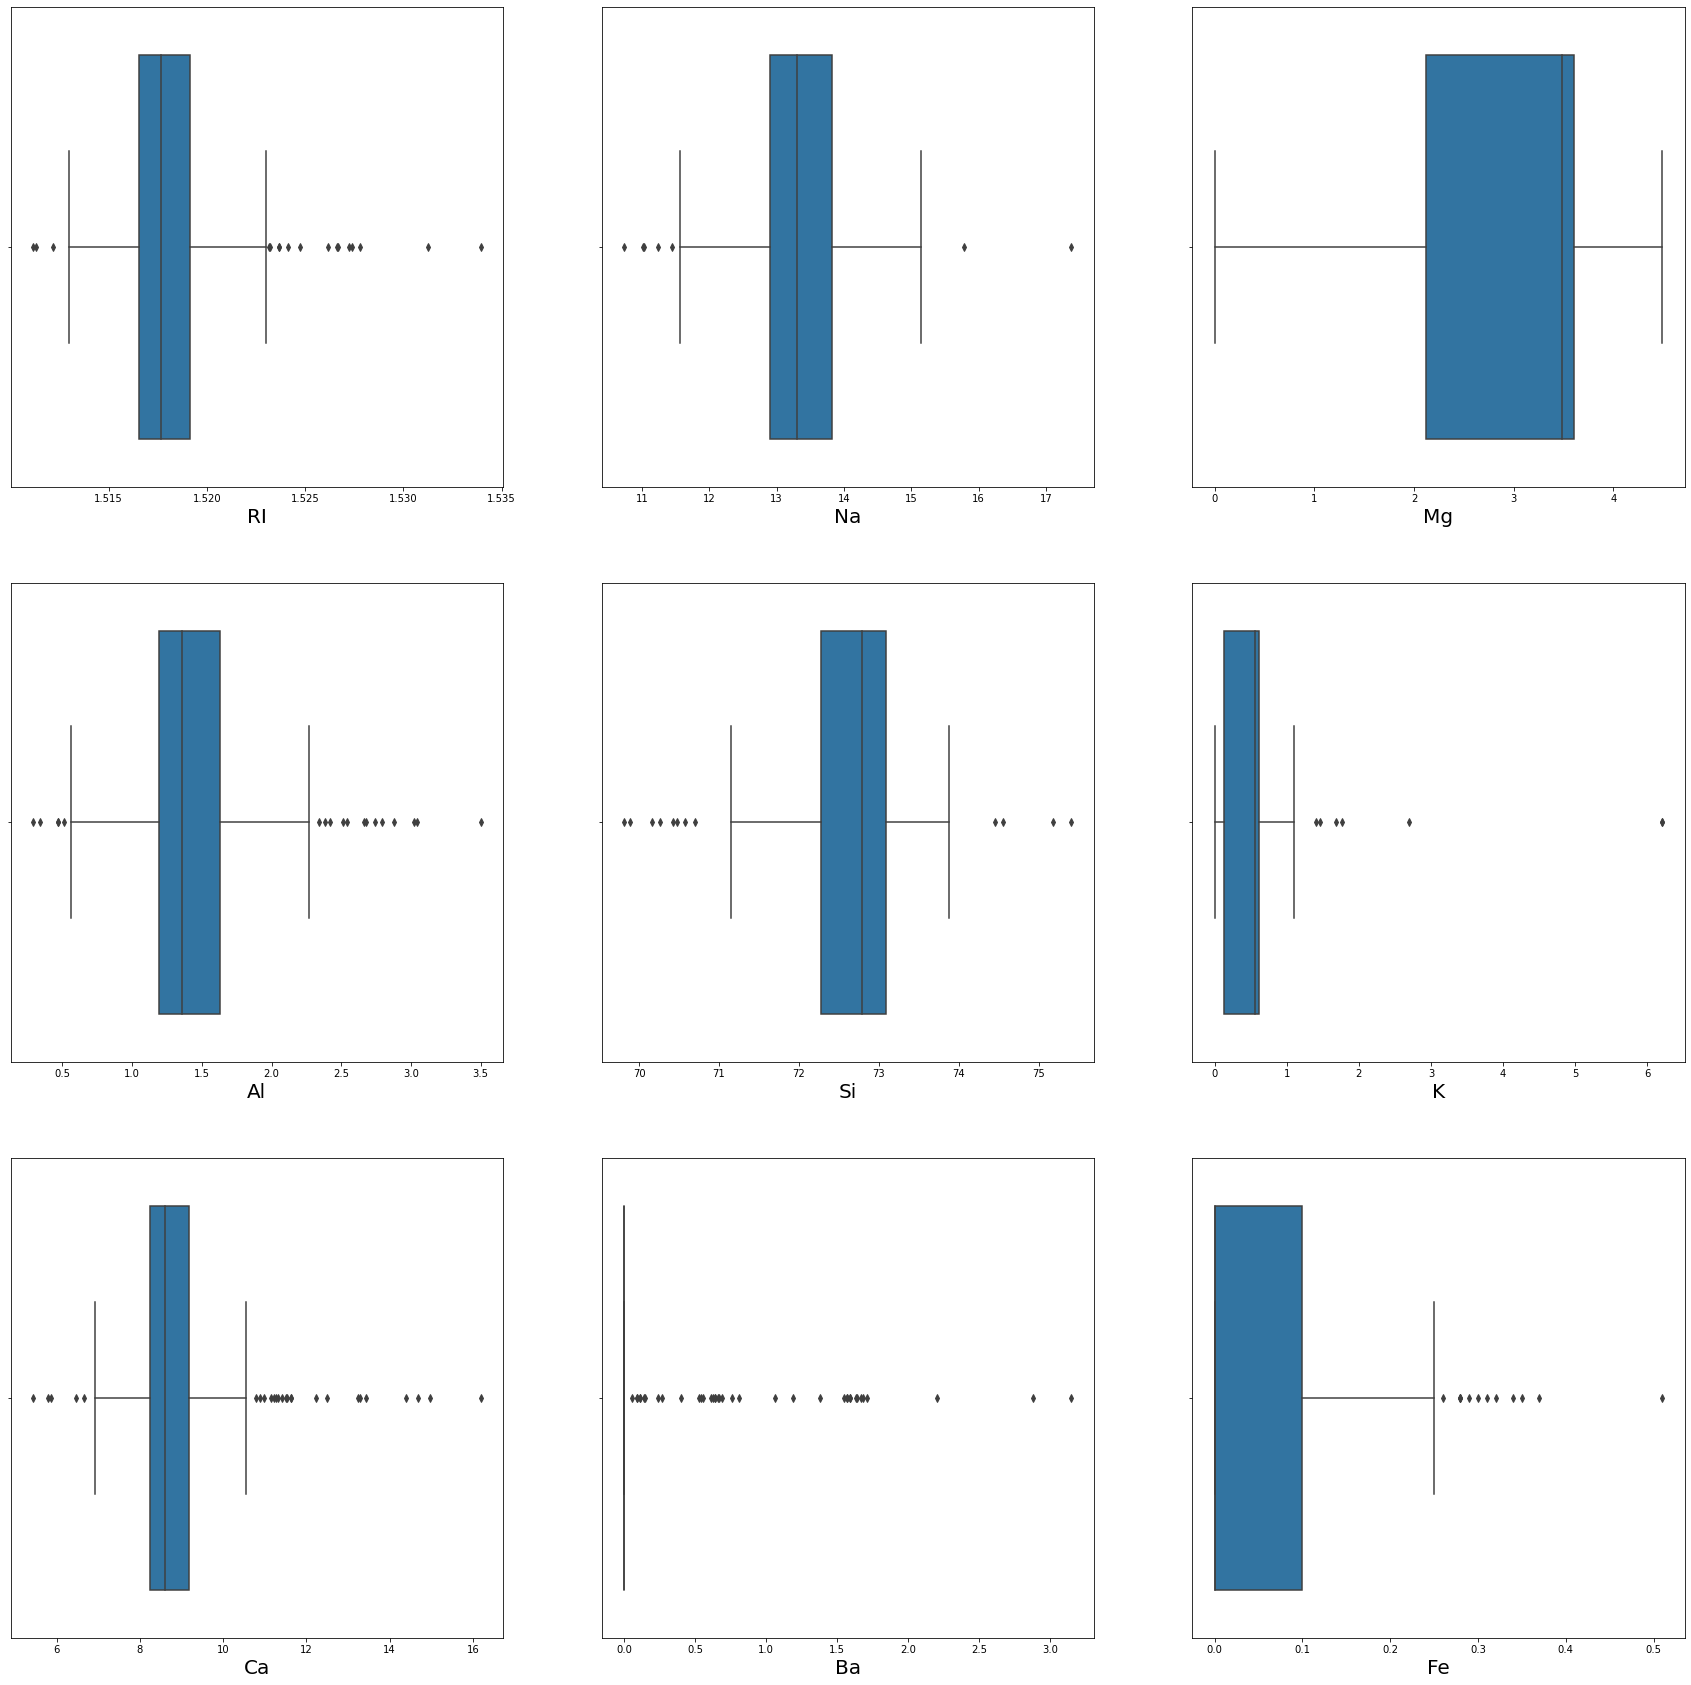

In [29]:
plt.figure(figsize=(30,30))
n=1
for i in feat:
    if n<10:
        ax=plt.subplot(3,3,n)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    n=n+1
plt.show()

SIGNIFICANT AMOUNT OF OUTLIERS PRESENT IN THE FEATURES EXCEPT MAGNESIUM

OUTLIERS HANDLING USING ZSCORE

In [30]:
from scipy.stats import zscore

In [31]:
z=np.abs(zscore(df))

In [32]:
df=df[(z<3).all(axis=1)]

In [33]:
df.shape

(194, 10)

loss after outliers removal

In [34]:
(214-194)/214*100

9.345794392523365

####  DIVIDING THE TARGET FURTHER INTO 2 CATEGORIES <BR>
#### 1-WINDOW GLASS <BR>
#### 0-NON WINDOW GLASS <BR>

In [35]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [36]:
df['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

defining the function which does the work of classifiying the categories from 1 to 4 in WINDOW GLASS(1)<BR>
FROM 5 TO 7 IN CATEGORY NON WINDOW GLASS(0) CATEGORY

In [37]:
def num(n):
    if(n<5):
        return 1
    else:
        return 0

In [38]:
df['category']=df['Type of glass'].apply(num)

In [39]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,category
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


In [40]:
df.drop(['Type of glass'],inplace=True,axis=1)

In [41]:
df['category'].value_counts()

1    154
0     40
Name: category, dtype: int64

IT VERY CLEAR THAT DATA IS IMBALANCED <BR>
WE HAVE TO BALANCE THIS USING SMOTE<BR>

DIVIDING DATASET INTO FEATURES AND TARGET (X AND Y)

In [42]:
x=df.drop(['category'],axis=1)

In [43]:
y=df['category']

USING POWER TRANSFORMER FOR STANDARDSIATION OF THE DATA

In [44]:
from sklearn.preprocessing import PowerTransformer

In [45]:
pt=PowerTransformer(method='yeo-johnson')

In [46]:
x_scaled=pd.DataFrame(pt.fit_transform(x),columns=x.columns)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif=pd.DataFrame()

In [49]:
vif['features']=x_scaled.columns

In [50]:
vif['scores']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [51]:
vif

,features,scores
0,RI,4.546371
1,Na,6.036163
2,Mg,10.897720
3,Al,3.311999
4,Si,3.686305
5,K,4.952505
6,Ca,9.082007
7,Ba,2.669646
8,Fe,1.053058


#### IT CAN BE OBSERVED THAT FEATURES <BR>
NA<BR>
MAGNESIUM<BR>
CALCIUM<BR>
    HAVE SCORES > 5 WHICH MEANS THEY ARE AT CRITICAL represent critical levels of multicollinearity where the coefficients are poorly estimated, and the p-values are questionable

WE WILL DROP CALCIUM AND AGAIN CHECK THE VIF SCORES

In [52]:
x_scaled.drop(['Ca'],axis=1,inplace=True)

In [53]:
vif=pd.DataFrame()

In [54]:
vif['features']=x_scaled.columns

In [55]:
vif['scores']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [56]:
vif

,features,scores
0,RI,4.155582
1,Na,2.444382
2,Mg,2.547374
3,Al,2.139227
4,Si,1.582030
5,K,2.191648
6,Ba,2.136732
7,Fe,1.048883


HENCE ALL THE VIF SCORES are less than 5 means we are out of danger of multi collinearity issue in our features

In [57]:
y.value_counts()

1    154
0     40
Name: category, dtype: int64

ITS VERY CLEAR THAT OUR DATA SET IS HIGHLY IMBALANCED AND WE HAVE TO USE SMOTE TO MAKE IT BALANCED FOR FURTHER PROCESSING

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
sm=SMOTE(0.75)

In [60]:
x_n,y_n=sm.fit_resample(x_scaled,y)

In [61]:
x_new=pd.DataFrame(x_n)

In [62]:
df=pd.concat([x_new,y_n],axis=1)

In [63]:
df.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe,category
0,3.469447e-17,0.375145,2.295067,-0.705895,-1.551856,-1.348170,-0.429499,-0.677737,1
1,-3.469447e-18,0.732539,0.587338,-0.073256,-0.037058,0.204416,-0.429499,-0.677737,1
2,-2.081668e-17,0.214038,0.507711,0.333353,0.425596,-0.114085,-0.429499,-0.677737,1
3,-3.469447e-18,-0.268665,0.734829,-0.237973,-0.243294,0.516387,-0.429499,-0.677737,1
4,-6.938894e-18,-0.176527,0.619650,-0.358065,0.590922,0.447598,-0.429499,-0.677737,1


In [64]:
df['category'].value_counts()

1    154
0    115
Name: category, dtype: int64

ITS LOOKS BALANCED NOW SO WE CAN PROCEED WITHOUT WORRYING ABOUT THE BIASING DUE TO IMBALANCE DATASET

In [65]:
x_scaled=df.drop(['category'],axis=1)

In [66]:
y=df['category']

----------------------------------------------------------------------------------------------------------------


SPLIITING DATASET INTO TRAIN AND TEST USING TRAIN_TEST_split

In [67]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve

LOGISTIC REGRESSION
----------------------------------

In [68]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=accuracy_score(y_train,lr_train_pred)
    lr_test_accuracy=accuracy_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}  --AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 0


TRAINING ACCURACY IS -98.14  --AND TESTING ACCURACY IS 98.15


AT RANDOM STATE-- 8


TRAINING ACCURACY IS -98.14  --AND TESTING ACCURACY IS 98.15


AT RANDOM STATE-- 33


TRAINING ACCURACY IS -98.14  --AND TESTING ACCURACY IS 98.15


AT RANDOM STATE-- 35


TRAINING ACCURACY IS -98.14  --AND TESTING ACCURACY IS 98.15


AT RANDOM STATE-- 43


TRAINING ACCURACY IS -98.14  --AND TESTING ACCURACY IS 98.15


AT RANDOM STATE-- 51


TRAINING ACCURACY IS -98.14  --AND TESTING ACCURACY IS 98.15


AT RANDOM STATE-- 56


TRAINING ACCURACY IS -98.14  --AND TESTING ACCURACY IS 98.15


AT RANDOM STATE-- 58


TRAINING ACCURACY IS -98.14  --AND TESTING ACCURACY IS 98.15


AT RANDOM STATE-- 60


TRAINING ACCURACY IS -98.14  --AND TESTING ACCURACY IS 98.15


AT RANDOM STATE-- 75


TRAINING ACCURACY IS -98.14  --AND TESTING ACCURACY IS 98.15


AT RANDOM STATE-- 85


TRAINING ACCURACY IS -98.14  --AND TESTING ACCURACY IS 98.15


AT RANDOM STATE-- 89


TRAINING ACCURACY IS -98.14  --

SINCE ITS GIVING SAME VALUE for all random states we can take any taking random state as 283

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=352)

In [70]:
def score(mod,x_train,x_test,y_train,y_test,train):
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=accuracy_score(y_train,y_pred)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TRAINIG')
        print('\n\n',confusion_matrix(y_train,y_pred))
        print('\n\nCLASSIFICATION REPORT for training --')
        print('\n\n',classification_report(y_train,y_pred))
        
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TESTING')
        print('\n\n',confusion_matrix(y_test,y_pred))
        print('\n\nCLASSIFICATION REPORT for testing --')
        print('\n\n',classification_report(y_test,y_pred))
      

In [71]:
lr=LogisticRegression()

In [72]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression() is 97.21


CONFUSION MATRIX FOR THE TRAINIG


 [[ 91   3]
 [  3 118]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.97      0.97      0.97        94
           1       0.98      0.98      0.98       121

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215



Testing SCORE FOR THE LogisticRegression() is 98.15


CONFUSION MATRIX FOR THE TESTING


 [[21  0]
 [ 1 32]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        33

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [73]:
test_pred=lr.predict(x_test)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
for i in range(2,11):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print('\nAT CV =',i)
    print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
    print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)      
    print('-------------')


AT CV = 2

CROSS VAL SCORE IS  95.16

TEST ACCURACY SCORE IS  98.15
-------------

AT CV = 3

CROSS VAL SCORE IS  95.53

TEST ACCURACY SCORE IS  98.15
-------------

AT CV = 4

CROSS VAL SCORE IS  95.54

TEST ACCURACY SCORE IS  98.15
-------------

AT CV = 5

CROSS VAL SCORE IS  95.54

TEST ACCURACY SCORE IS  98.15
-------------

AT CV = 6

CROSS VAL SCORE IS  94.81

TEST ACCURACY SCORE IS  98.15
-------------

AT CV = 7

CROSS VAL SCORE IS  95.53

TEST ACCURACY SCORE IS  98.15
-------------

AT CV = 8

CROSS VAL SCORE IS  95.14

TEST ACCURACY SCORE IS  98.15
-------------

AT CV = 9

CROSS VAL SCORE IS  95.17

TEST ACCURACY SCORE IS  98.15
-------------

AT CV = 10

CROSS VAL SCORE IS  95.17

TEST ACCURACY SCORE IS  98.15
-------------


SINCE THERE IS NOT MYCH DIFFERNCE BETWEEEN CROSS VAL SCORE AND TEST ACCURACY SCORE AT CV =5 <BR>
IT CAN BE DEDUCED THAT OUR MODEL IS NOT OVERFITTING AND WE CAN PROCEED WITH RANDOM STATE -352 AND CV=5

In [74]:
from sklearn.model_selection import GridSearchCV

---------------------HYPER PARAMETER TUNING FOR LOGISTIC REGRESSION---------------------------------------------------------

In [75]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [76]:
C = np.logspace(-10, 10, 50)
penalty = ['l1', 'l2']

In [77]:
params={'C':C,'penalty':penalty}

In [78]:
gsc=GridSearchCV(lr,param_grid=params)

In [79]:
gsc.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 2.55954792e-10, 6.55128557e-10, 1.67683294e-09,
       4.29193426e-09, 1.09854114e-08, 2.81176870e-08, 7.19685673e-08,
       1.84206997e-07, 4.71486636e-07, 1.20679264e-06, 3.08884360e-06,
       7.90604321e-06, 2.02358965e-05, 5.17947468e-05, 1.32571137e-04,
       3.39322177e-04, 8.68511374e-04, 2.22299648e-0...
       2.68269580e+01, 6.86648845e+01, 1.75751062e+02, 4.49843267e+02,
       1.15139540e+03, 2.94705170e+03, 7.54312006e+03, 1.93069773e+04,
       4.94171336e+04, 1.26485522e+05, 3.23745754e+05, 8.28642773e+05,
       2.12095089e+06, 5.42867544e+06, 1.38949549e+07, 3.55648031e+07,
       9.10298178e+07, 2.32995181e+08, 5.96362332e+08, 1.52641797e+09,
       3.90693994e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2']})

In [80]:
gsc.best_params_

{'C': 0.03727593720314938, 'penalty': 'l2'}

In [81]:
lr=LogisticRegression()

In [82]:
lr=gsc.best_estimator_

In [83]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression(C=0.03727593720314938) is 95.81


CONFUSION MATRIX FOR THE TRAINIG


 [[ 88   6]
 [  3 118]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.97      0.94      0.95        94
           1       0.95      0.98      0.96       121

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



Testing SCORE FOR THE LogisticRegression(C=0.03727593720314938) is 96.3


CONFUSION MATRIX FOR THE TESTING


 [[20  1]
 [ 1 32]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        33

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96     

In [84]:
test_pred=lr.predict(x_test)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [85]:
cross_val=cross_val_score(lr,x_scaled,y,cv=5).mean()

In [86]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)


CROSS VAL SCORE IS  95.16

TEST ACCURACY SCORE IS  96.3


SINCE ACCURACIES REMAIN SAME EVEN AFTER HYPER PARAMETER TUNING WE WILL CONTINUE WITH THIS PARAMETERS 

MODEL 2)---DECISION TREE MODELING
----------------------

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt=DecisionTreeClassifier(random_state=352)

In [89]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=352)

In [90]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(random_state=352) is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[ 94   0]
 [  0 121]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       121

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



Testing SCORE FOR THE DecisionTreeClassifier(random_state=352) is 96.3


CONFUSION MATRIX FOR THE TESTING


 [[20  1]
 [ 1 32]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        33

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96       

HYPER PARAMETER TUNING FOR DECISION TREE CLASSIFIER

In [91]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [92]:
para={'criterion':['gini','entropy','log_loss'],
      'max_depth':np.arange(25,30),
      'min_samples_split':np.arange(3,5),
      'min_samples_leaf':np.arange(8,12)}

In [93]:
dgsc=GridSearchCV(dt,param_grid=para,cv=8)

In [94]:
dgsc.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(random_state=352),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([25, 26, 27, 28, 29]),
                         'min_samples_leaf': array([ 8,  9, 10, 11]),
                         'min_samples_split': array([3, 4])})

In [95]:
dgsc.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 8,
 'min_samples_split': 3}

In [96]:
dt=dgsc.best_estimator_

In [97]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(max_depth=25, min_samples_leaf=8, min_samples_split=3,
                       random_state=352) is 95.81


CONFUSION MATRIX FOR THE TRAINIG


 [[ 94   0]
 [  9 112]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.91      1.00      0.95        94
           1       1.00      0.93      0.96       121

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



Testing SCORE FOR THE DecisionTreeClassifier(max_depth=25, min_samples_leaf=8, min_samples_split=3,
                       random_state=352) is 96.3


CONFUSION MATRIX FOR THE TESTING


 [[21  0]
 [ 2 31]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.94      0.97        33

  

In [98]:
test_pred=dt.predict(x_test)
dt_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [99]:
cross_val=cross_val_score(dt,x_scaled,y,cv=5).mean()

In [100]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",dt_test_accuracy)


CROSS VAL SCORE IS  95.17

TEST ACCURACY SCORE IS  96.3


SINCE TRAINING HAVE COME NEAR THE TESTING SCORE AND TESTING SCORES ARE ALMOST EQUAL TO CROSS VAL SCORE WE WILL WILL CONTINUE WITH THESE PARAMETERS

MODEL 3)---------------------------RANDOM FOREST CLASSIFIER----------------------------------
----------------------------------

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rfc=RandomForestClassifier()

In [103]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [104]:
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)

In [105]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier() is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[ 94   0]
 [  0 121]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       121

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



Testing SCORE FOR THE RandomForestClassifier() is 98.15


CONFUSION MATRIX FOR THE TESTING


 [[21  0]
 [ 1 32]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        33

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



HYPER PARAMETER TUNING FOR RANDOM FOREST CLASSIFIER --------------------------

In [106]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [107]:
rfc=RandomForestClassifier()

In [108]:
parma={"n_estimators":np.arange(50,60),
      "criterion":["gini", "entropy", "log_loss"],
       "min_samples_split":np.arange(2,5),
       "oob_score":[True,False],
       }

In [109]:
rgsc=GridSearchCV(rfc,param_grid=parma)

In [110]:
rgsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'oob_score': [True, False]})

In [111]:
rgsc.best_params_

{'criterion': 'entropy',
 'min_samples_split': 2,
 'n_estimators': 58,
 'oob_score': True}

In [112]:
rfc=rgsc.best_estimator_

In [113]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier(criterion='entropy', n_estimators=58, oob_score=True) is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[ 94   0]
 [  0 121]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       121

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



Testing SCORE FOR THE RandomForestClassifier(criterion='entropy', n_estimators=58, oob_score=True) is 96.3


CONFUSION MATRIX FOR THE TESTING


 [[20  1]
 [ 1 32]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        33

    accuracy                           0.96        54
   macro avg       0.96      0.9

In [114]:
test_pred=rfc.predict(x_test)
rfc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [115]:
cross_val=cross_val_score(rfc,x_scaled,y,cv=5).mean()

In [116]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",rfc_test_accuracy)


CROSS VAL SCORE IS  95.91

TEST ACCURACY SCORE IS  96.3


SINCE THE CROSS VAL SCORE IS ALMOST EQUAL TO TEST ACCURACY SCORE WE CAN CONTINUE WITH THESE PARAMETERS

MODEL 4)-BAGGING CLASSIFIER
---------------------------------------------------------

In [117]:
from sklearn.ensemble import BaggingClassifier

In [118]:
bc=BaggingClassifier()

In [119]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier() is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[ 94   0]
 [  0 121]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       121

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



Testing SCORE FOR THE BaggingClassifier() is 94.44


CONFUSION MATRIX FOR THE TESTING


 [[20  1]
 [ 2 31]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.95        33

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



HYPER PARAMETER TUNING FOR BAGGING CLASSIFIER

In [120]:
bc=BaggingClassifier()

In [121]:
par={"n_estimators":np.arange(50,60),
    "oob_score":[True,False],
    "random_state":[200,220,275,300,375,350,325],
    }

In [122]:
bcgs=GridSearchCV(bc,param_grid=par)

In [123]:
bcgs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'oob_score': [True, False],
                         'random_state': [200, 220, 275, 300, 375, 350, 325]})

In [124]:
bcgs.best_params_

{'n_estimators': 50, 'oob_score': True, 'random_state': 200}

In [125]:
bc=bcgs.best_estimator_

In [126]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier(n_estimators=50, oob_score=True, random_state=200) is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[ 94   0]
 [  0 121]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       121

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



Testing SCORE FOR THE BaggingClassifier(n_estimators=50, oob_score=True, random_state=200) is 96.3


CONFUSION MATRIX FOR THE TESTING


 [[20  1]
 [ 1 32]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        33

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96     

In [146]:
test_pred=bc.predict(x_test)
bc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [147]:
cross_val=cross_val_score(bc,x_scaled,y,cv=5).mean()

In [148]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",bc_test_accuracy)


CROSS VAL SCORE IS  95.53

TEST ACCURACY SCORE IS  96.3


SINCE THE DIFFERENCE IS NOT MUCH BETWEEN CROSS VAL SCORE AND TEST ACCURACY SCORE WE CAN PROCEED WITH THESE PARAMETERS

MODEL 5)----KNN
-----------------------------

In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
knn=KNeighborsClassifier()

In [151]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [152]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier() is 97.67


CONFUSION MATRIX FOR THE TRAINIG


 [[ 92   2]
 [  3 118]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.97      0.98      0.97        94
           1       0.98      0.98      0.98       121

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215



Testing SCORE FOR THE KNeighborsClassifier() is 98.15


CONFUSION MATRIX FOR THE TESTING


 [[21  0]
 [ 1 32]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        33

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



HYPER PARAMETER TUNING THE PARAMETERS
----------------------------

In [153]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [154]:
knn=KNeighborsClassifier()

In [155]:
pop={"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':np.arange(3,6),
    'leaf_size':[25,28,30,32,35,38]}

In [156]:
kgsc=GridSearchCV(knn,param_grid=pop)

In [157]:
kgsc.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 28, 30, 32, 35, 38],
                         'n_neighbors': array([3, 4, 5])})

In [158]:
kgsc.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4}

In [159]:
knn=kgsc.best_estimator_

In [160]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier(leaf_size=25, n_neighbors=4) is 98.14


CONFUSION MATRIX FOR THE TRAINIG


 [[ 93   1]
 [  3 118]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.97      0.99      0.98        94
           1       0.99      0.98      0.98       121

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215



Testing SCORE FOR THE KNeighborsClassifier(leaf_size=25, n_neighbors=4) is 98.15


CONFUSION MATRIX FOR THE TESTING


 [[21  0]
 [ 1 32]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        33

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.

In [161]:
test_pred=knn.predict(x_test)
knn_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [162]:
cross_val=cross_val_score(knn,x_scaled,y,cv=5).mean()

In [163]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",knn_test_accuracy)


CROSS VAL SCORE IS  97.4

TEST ACCURACY SCORE IS  98.15


MODEL 6)-----SVC-----------
-----------------------

In [164]:
from sklearn.svm import SVC

In [165]:
svc=SVC()

In [166]:
svc.fit(x_train,y_train)

SVC()

In [167]:
score(svc,x_train,x_test,y_train,y_test,train=True)
score(svc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVC() is 98.6


CONFUSION MATRIX FOR THE TRAINIG


 [[ 93   1]
 [  2 119]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.99      0.98      0.99       121

    accuracy                           0.99       215
   macro avg       0.99      0.99      0.99       215
weighted avg       0.99      0.99      0.99       215



Testing SCORE FOR THE SVC() is 98.15


CONFUSION MATRIX FOR THE TESTING


 [[21  0]
 [ 1 32]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        33

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [168]:
test_pred=svc.predict(x_test)
svc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [169]:
cross_val=cross_val_score(svc,x_scaled,y,cv=5).mean()

In [170]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",svc_test_accuracy)


CROSS VAL SCORE IS  96.66

TEST ACCURACY SCORE IS  98.15


MODEL 7) ADABOOST CLASSIFIER-
----------------------

In [171]:
from sklearn.ensemble import AdaBoostClassifier

In [172]:
adc=AdaBoostClassifier()

In [173]:
adc.fit(x_train,y_train)

AdaBoostClassifier()

In [174]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier() is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[ 94   0]
 [  0 121]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       121

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



Testing SCORE FOR THE AdaBoostClassifier() is 96.3


CONFUSION MATRIX FOR THE TESTING


 [[20  1]
 [ 1 32]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        33

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



------HYPER PARAMETER TUNING FOR ADABOOST CLASSIFIER-----------------

In [180]:
adc.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [181]:
adc=AdaBoostClassifier()

In [182]:
param={"algorithm":['SAMME', 'SAMME.R'],
      'n_estimators':np.arange(60,70),
      'random_state':[121,234,345,389,567]}


In [183]:
adgs=GridSearchCV(adc,param_grid=param)

In [184]:
adgs.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
                         'random_state': [121, 234, 345, 389, 567]})

In [185]:
adgs.best_params_

{'algorithm': 'SAMME', 'n_estimators': 68, 'random_state': 121}

In [186]:
adc=adgs.best_estimator_

In [187]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier(algorithm='SAMME', n_estimators=68, random_state=121) is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[ 94   0]
 [  0 121]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       121

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



Testing SCORE FOR THE AdaBoostClassifier(algorithm='SAMME', n_estimators=68, random_state=121) is 96.3


CONFUSION MATRIX FOR THE TESTING


 [[20  1]
 [ 1 32]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        33

    accuracy                           0.96        54
   macro avg       0.96      0.96      0

In [188]:
test_pred=adc.predict(x_test)
adc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [189]:
cross_val=cross_val_score(adc,x_scaled,y,cv=5).mean()

In [190]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",adc_test_accuracy)


CROSS VAL SCORE IS  94.8

TEST ACCURACY SCORE IS  96.3


SINCE THE DIFFERENCE BETWEEN THE VALUES OF CROSS VAL AND TEST ACCURACY ARE CLOSE WE WILL CONTINUW WITH THESE PARAMETERS AS FINAL ONES

------------PLOTTING ROC CURVES FOR BOTH TESTING AND TRAINIG------------
---

In [191]:
from sklearn.metrics import plot_roc_curve

ROC CURVE FOR TRAINING

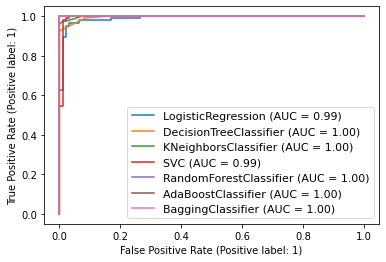

In [192]:
disp=plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(dt,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(adc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(bc,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

ROC CURVE FOR TESTING

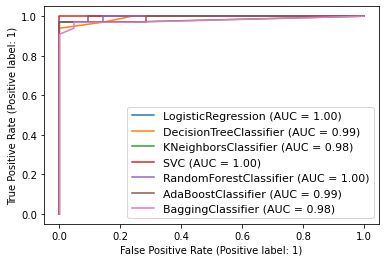

In [194]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

CONCLUSION-<BR>
#### SINCE FOR RANDOM FOREST CLASSIFIER THE AUC IS SAME AND THE DIFFERENCE BETWEEN THE CROSS VAL SCORE AND THE ACCURACY SCORE IS THE LOWEST WE WILL CHOOSE "RANDOM FOREST CLASSIFIER " AS OUR FINAL MODEL 

In [195]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier(criterion='entropy', n_estimators=58, oob_score=True) is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[ 94   0]
 [  0 121]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       121

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



Testing SCORE FOR THE RandomForestClassifier(criterion='entropy', n_estimators=58, oob_score=True) is 98.15


CONFUSION MATRIX FOR THE TESTING


 [[21  0]
 [ 1 32]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        33

    accuracy                           0.98        54
   macro avg       0.98      0.

In [199]:
test_pred=rfc.predict(x_test)
rfc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [200]:
cross_val=cross_val_score(rfc,x_scaled,y,cv=5).mean()

In [201]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",rfc_test_accuracy)


CROSS VAL SCORE IS  95.91

TEST ACCURACY SCORE IS  98.15


SAVING THE MODEL
------------------

In [203]:
import pickle

In [204]:
with open('rfc_model_pkl', 'wb') as files:
    pickle.dump(rfc, files)

---------------------------------------------------------------